# Step1 Camera Caliburation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pmimg
from pathlib import Path

In [2]:
image_folder_name = './camera_cal/'
image_folder_path = Path(image_folder_name)
all_image_path = [str(path.absolute()) for path in image_folder_path.glob('*.jpg')]

nx = 9
ny = 6

In [12]:
objpoints = []
imgpoints = []

In [13]:
objp = np.zeros((ny*nx, 3), np.float32)
objp[:, :2] = np.mgrid[0:ny, 0:nx].T.reshape(-1, 2)

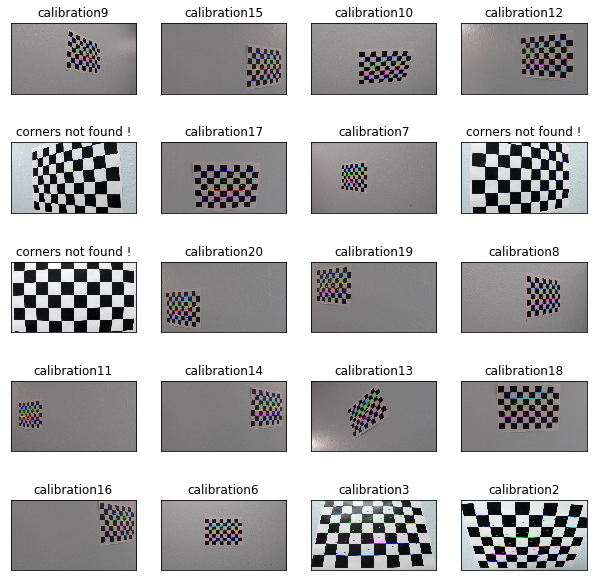

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
for index, path in enumerate(all_image_path):
    
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    img_plot = cv2.drawChessboardCorners(img.copy(), (ny, nx), corners, ret)
    
    x_index = index % 4
    y_index = index // 4
    
    axes[y_index, x_index].imshow(img_plot)
    axes[y_index, x_index].set_xticks([])
    axes[y_index, x_index].set_yticks([])
    if ret:
        axes[y_index, x_index].set_title(path.split('/')[-1].split('.')[0])
    else:
        axes[y_index, x_index].set_title('corners not found !')
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

Text(0.5,1,'undistorted image: ')

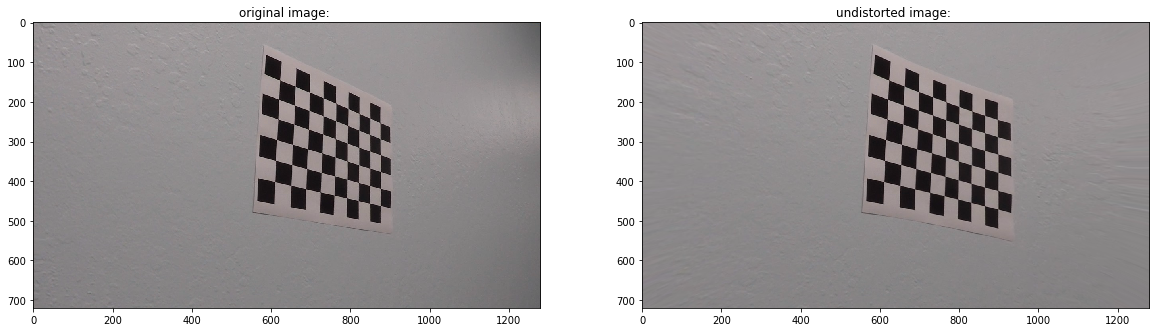

In [6]:
img = cv2.imread(all_image_path[0])
im_size = (img.shape[1], img.shape[0])

ret, mtx, dist, rvecs, tvecs = \
    cv2.calibrateCamera(objpoints, imgpoints, im_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img)
axes[0].set_title('original image: ')
axes[1].imshow(dst)
axes[1].set_title('undistorted image: ')

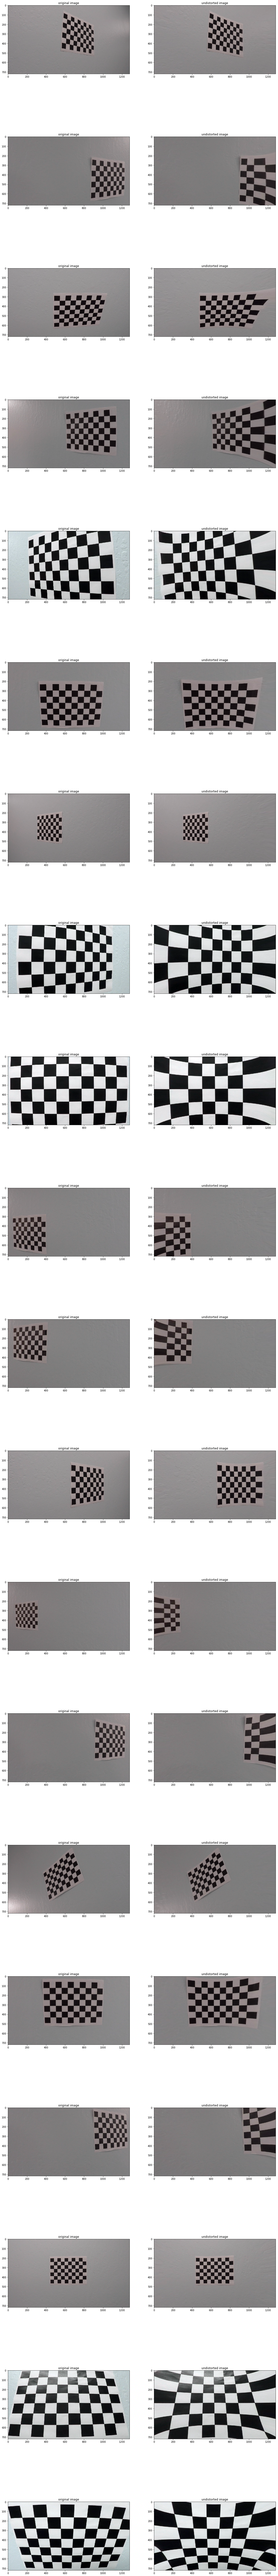

In [7]:
fig, axes = plt.subplots(len(all_image_path), 2, figsize=(20, 10*len(all_image_path)))
for index, path in enumerate(all_image_path):
    img = cv2.imread(path)
    im_size = (img.shape[1], img.shape[0])
    
    ret, mtx, dist, rvecs, tvecs  = \
        cv2.calibrateCamera(objpoints, imgpoints, im_size, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    
    axes[index, 0].imshow(img)
    axes[index, 0].set_title('original image')
    axes[index, 1].imshow(dst)
    axes[index, 1].set_title('undistorted image')

height= 720  width= 1280


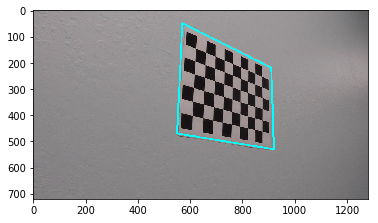

In [8]:
img_9 = cv2.imread('./camera_cal/calibration9.jpg')
height, width = img_9.shape[:2]
print('height=', height, ' width=', width)

pts = np.array([[570,50], [550,470], [920,530], [910,220]], np.int32)
cv2.polylines(img_9, [pts], True, (0,255,255), thickness=5)

plt.imshow(img_9);

In [9]:
src = np.float32([[570, 50], [910, 220], [470, 530], [920, 530]])
dst = np.float32([[70, 70], [width-70, 70], [0, height], [width-70, height-70]])

In [10]:
M = cv2.getPerspectiveTransform(src, dst)
img_9_warped = cv2.warpPerspective(img_9, M, dsize=(width, height))

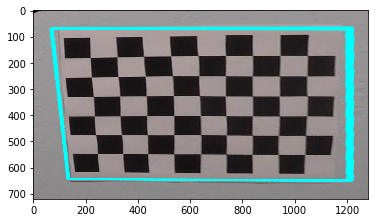

In [11]:
plt.imshow(img_9_warped)